### Importing dependencies and loading Covid-19 dataset

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

# Path of the file to read.
data_path = "countries-aggregated_csv.csv"
data = pd.read_csv(data_path )

## Data exploration

In [42]:
# Checks if there is any missing data on the dataset
data.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [43]:
# Checks the types of the data in the columns
data.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [44]:
# Shows how many rows and columns are in the dataset, and if there is any missing data, and the type of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143668 entries, 0 to 143667
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       143668 non-null  object
 1   Country    143668 non-null  object
 2   Confirmed  143668 non-null  int64 
 3   Recovered  143668 non-null  int64 
 4   Deaths     143668 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.5+ MB


In [45]:
data.describe()

,Confirmed,Recovered,Deaths
count,1.436680e+05,1.436680e+05,143668.000000
mean,5.712247e+05,1.635121e+05,12306.660189
std,2.838398e+06,1.032340e+06,52910.346456
min,0.000000e+00,0.000000e+00,0.000000
25%,9.100000e+02,0.000000e+00,13.000000
50%,1.749300e+04,7.240000e+02,289.000000
75%,2.060302e+05,2.687300e+04,3647.000000
max,7.069942e+07,3.097475e+07,866540.000000


### Plotting the histograms of the countries with different features.

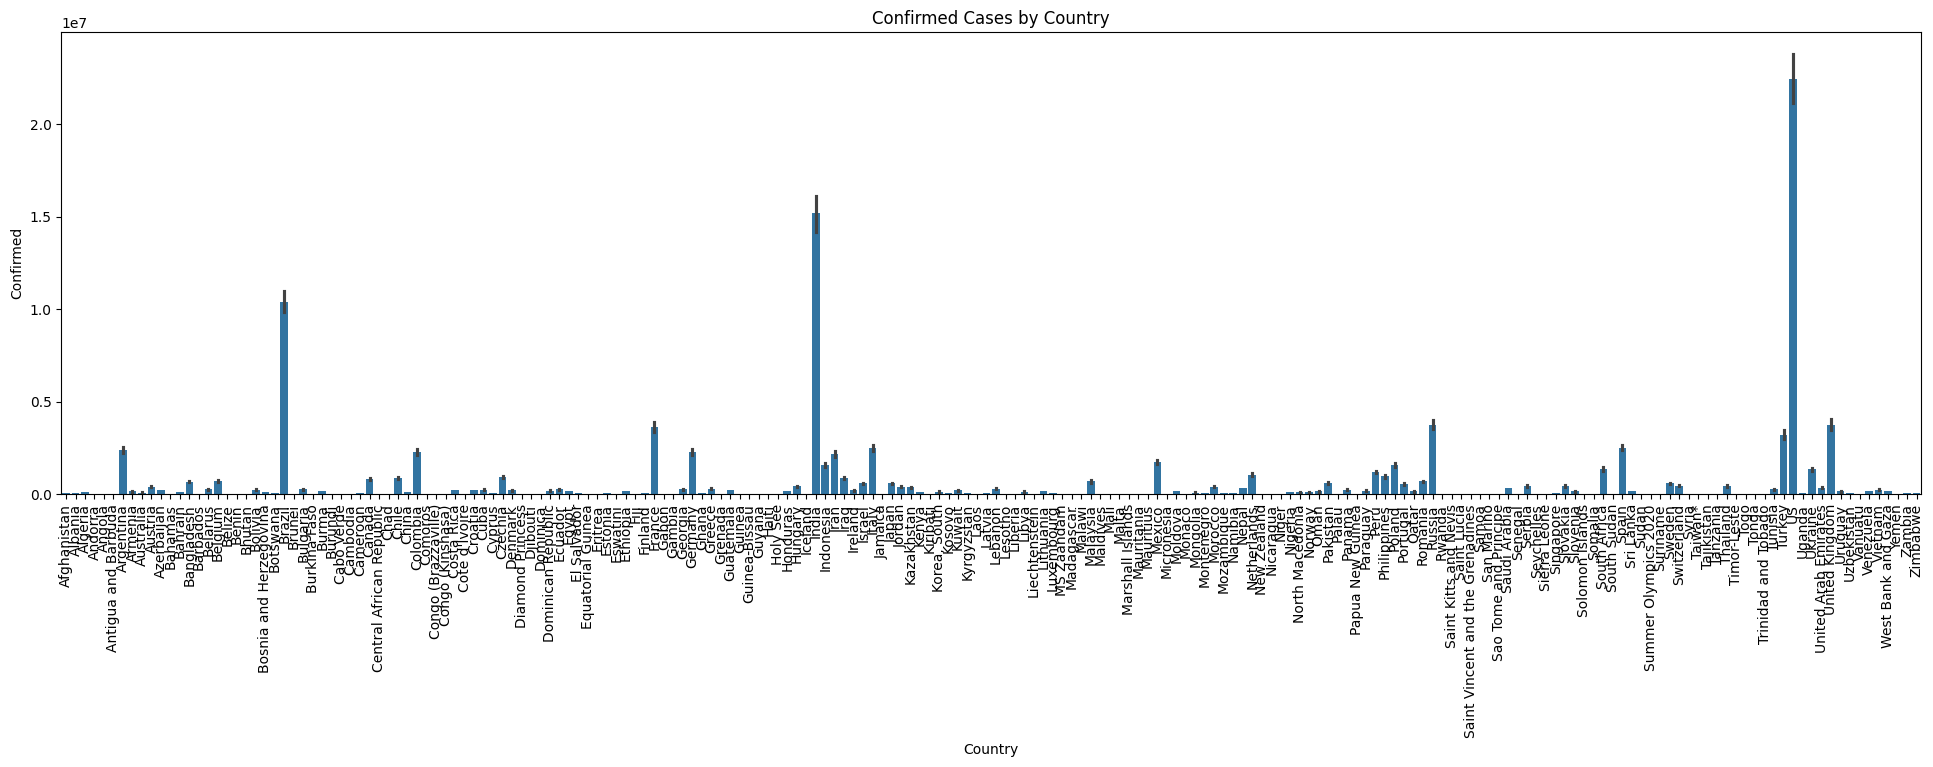

In [46]:
# Confirmed
plt.figure(figsize=(24, 6))
sns.barplot(x='Country', y='Confirmed', data=data)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Confirmed')
plt.title('Confirmed Cases by Country')
plt.show()

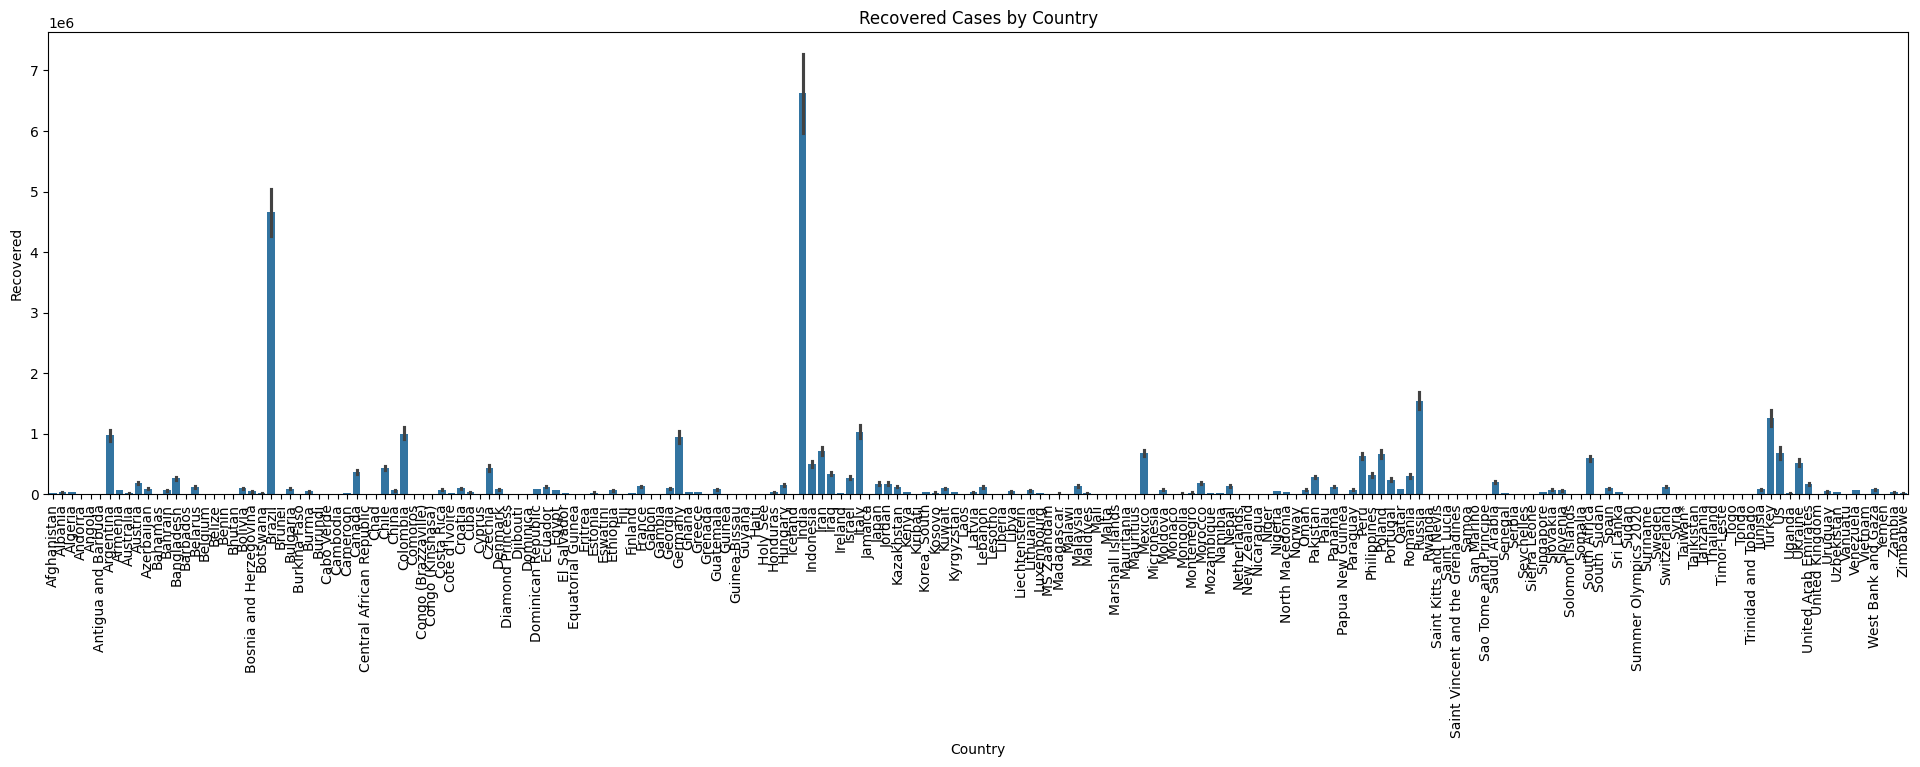

In [47]:
# Recovered
plt.figure(figsize=(24, 6))
sns.barplot(x='Country', y='Recovered', data=data)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Recovered')
plt.title('Recovered Cases by Country')
plt.show()

Brazil, India and US had high amount of confirmed cases, but US had the lowest recovery compared to the other countries by far

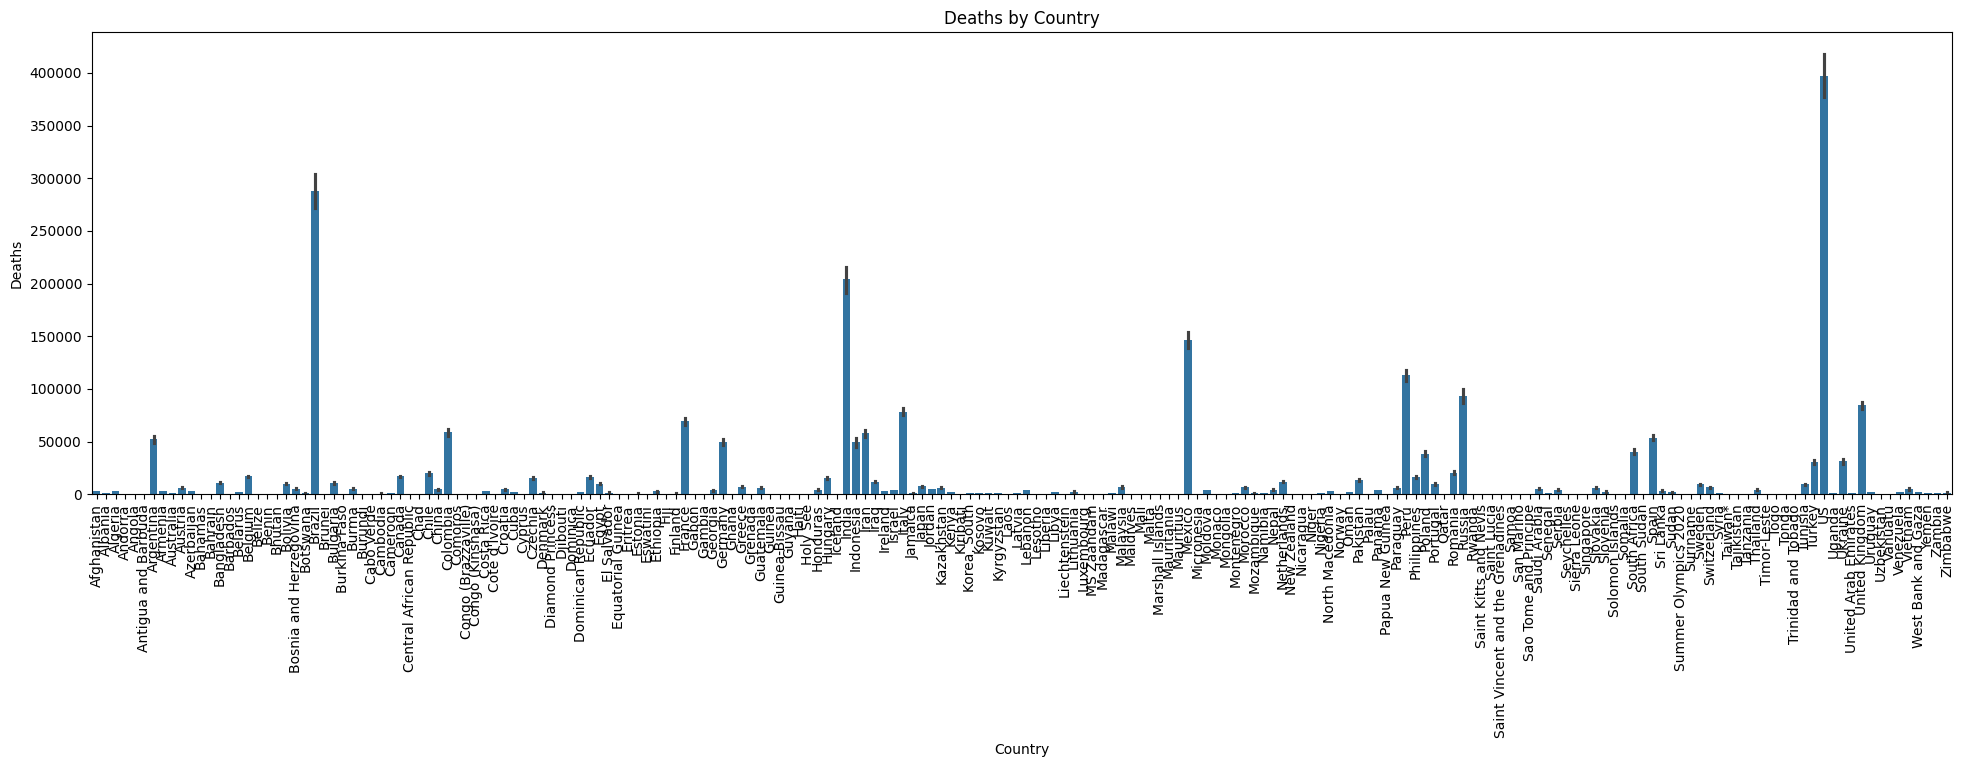

In [48]:
# Deaths
plt.figure(figsize=(24, 6))
sns.barplot(x='Country', y='Deaths', data=data)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Deaths by Country')
plt.show()

Even though Brazil and India had a lot of recovery cases, they still had a lot of deaths. Mexico, Peru, Russia and UK also had a lot of deaths

### Exploring what information can be found about Finland

In [49]:
# Adding year column to the dataset, so that we can analyze the data by year
data["Year"] = pd.to_datetime(data["Date"]).dt.year

In [50]:
# Shows the first 5 rows of the dataset
data.head()

,Date,Country,Confirmed,Recovered,Deaths,Year
0,1/22/2020,Afghanistan,0,0,0,2020
1,1/23/2020,Afghanistan,0,0,0,2020
2,1/24/2020,Afghanistan,0,0,0,2020
3,1/25/2020,Afghanistan,0,0,0,2020
4,1/26/2020,Afghanistan,0,0,0,2020


In [51]:
# Checking if Finland is in the dataset
finland = data[data["Country"] == "Finland"]
finland.head()

,Date,Country,Confirmed,Recovered,Deaths,Year
44713,1/22/2020,Finland,0,0,0,2020
44714,1/23/2020,Finland,0,0,0,2020
44715,1/24/2020,Finland,0,0,0,2020
44716,1/25/2020,Finland,0,0,0,2020
44717,1/26/2020,Finland,0,0,0,2020


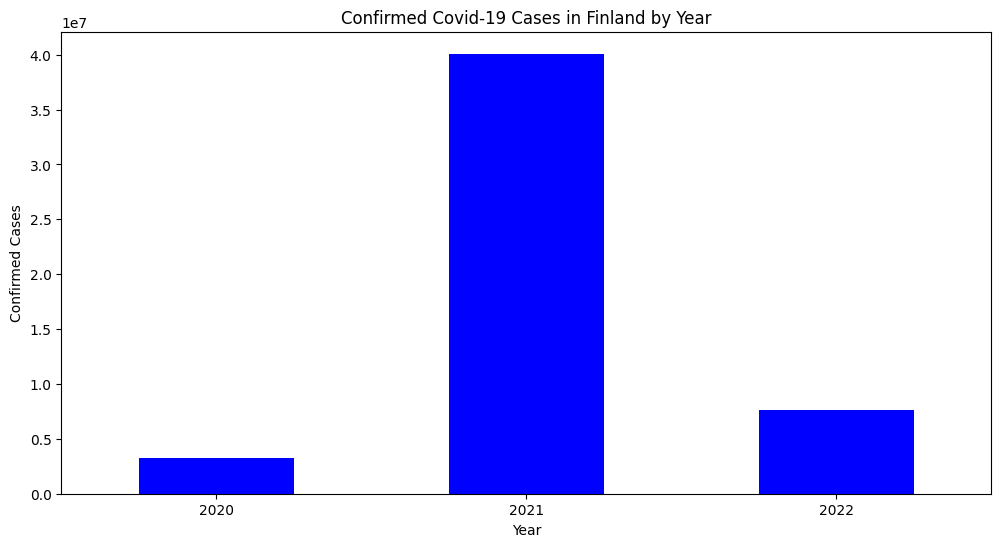

Total number of confirmed Covid-19 cases in Finland in 2020: 3222027
Total number of confirmed Covid-19 cases in Finland in 2021: 40085121
Total number of confirmed Covid-19 cases in Finland in 2022: 7670184


In [52]:
# Confirmed cases in Finland by year dataframe
confirmed_cases_finland_by_year = data[(data['Country'] == 'Finland')].groupby("Year")["Confirmed"].sum()

# Plotting the confirmed cases in Finland by year
plt.figure(figsize=(12, 6))
confirmed_cases_finland_by_year.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Covid-19 Cases in Finland by Year')
plt.xticks(rotation=0)
plt.show()

# Looping through the confirmed cases in Finland by year dataframe
for year, confirmed_cases in confirmed_cases_finland_by_year.items():
    print(f"Total number of confirmed Covid-19 cases in Finland in {year}: {confirmed_cases}")

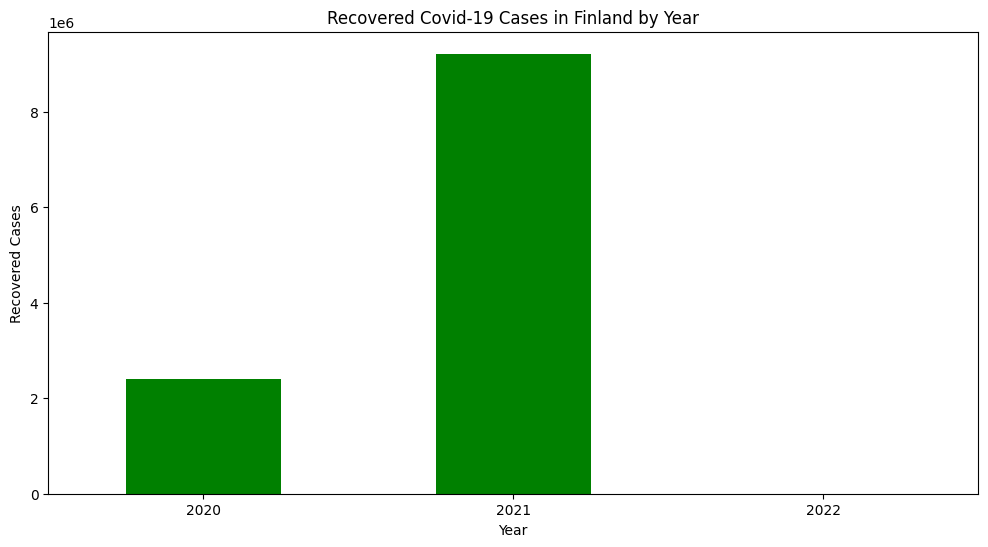

Total number of recovered Covid-19 cases in Finland in 2020: 2412672
Total number of recovered Covid-19 cases in Finland in 2021: 9217000
Total number of recovered Covid-19 cases in Finland in 2022: 0


In [53]:
# Recovered cases in Finland by year
recovered_cases_finland_by_year = data[(data['Country'] == 'Finland')].groupby("Year")["Recovered"].sum()

# Plotting the recovered cases in Finland by year
plt.figure(figsize=(12, 6))
recovered_cases_finland_by_year.plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Recovered Cases')
plt.title('Recovered Covid-19 Cases in Finland by Year')
plt.xticks(rotation=0)
plt.show()

# Looping through the recovered cases in Finland by year dataframe
for year, recovered_cases in recovered_cases_finland_by_year.items():
    print(f"Total number of recovered Covid-19 cases in Finland in {year}: {recovered_cases}")


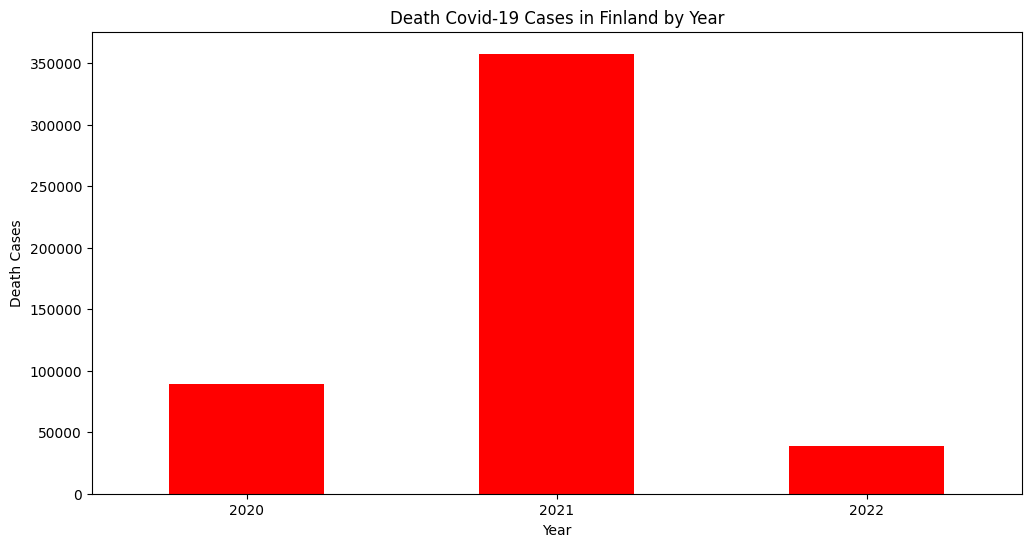

Total number of death Covid-19 cases in Finland in 2020: 88920
Total number of death Covid-19 cases in Finland in 2021: 357671
Total number of death Covid-19 cases in Finland in 2022: 38439


In [54]:
# Death cases in Finland by year
death_cases_finland_by_year = data[(data['Country'] == 'Finland')].groupby("Year")["Deaths"].sum()

# Plotting the death cases in Finland by year
plt.figure(figsize=(12, 6))
death_cases_finland_by_year.plot(kind='bar', color='red')
plt.xlabel('Year')
plt.ylabel('Death Cases')
plt.title('Death Covid-19 Cases in Finland by Year')
plt.xticks(rotation=0)
plt.show()

# Looping through the death cases in Finland by year dataframe
for year, death_cases in death_cases_finland_by_year.items():
    print(f"Total number of death Covid-19 cases in Finland in {year}: {death_cases}")

Plotting the number of cases in Finland between 2020-2022

C:\Users\sami_\AppData\Local\Temp\ipykernel_13908\1773207243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finland["Date"] = pd.to_datetime(df_finland["Date"])


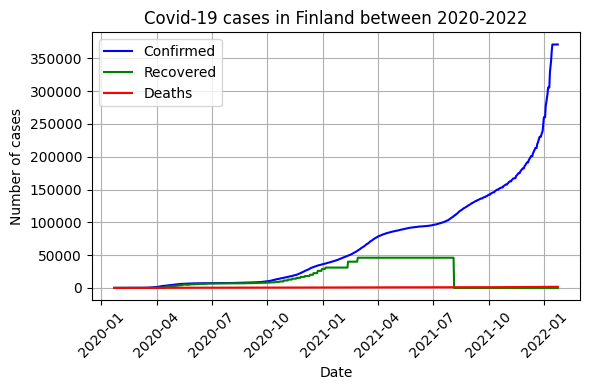

In [55]:
# Making Finland dataframe to show the number of confirmed, recovered and death cases in Finland
df_finland = data[data["Country"] == "Finland"]

# Changing the date column to datetime format
df_finland["Date"] = pd.to_datetime(df_finland["Date"])

# Plotting lineplots of confirmed, recovered and death cases in Finland
plt.figure(figsize=(6,4))
sns.lineplot(x="Date", y="Confirmed", data=df_finland, color="blue", label="Confirmed")
sns.lineplot(x="Date", y="Recovered", data=df_finland, color="green", label="Recovered")
sns.lineplot(x="Date", y="Deaths", data=df_finland, color="red", label="Deaths")
plt.xlabel("Date")
plt.ylabel("Number of cases")
plt.title("Covid-19 cases in Finland between 2020-2022")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Plotting pie chart to visualize total sizes of each group.

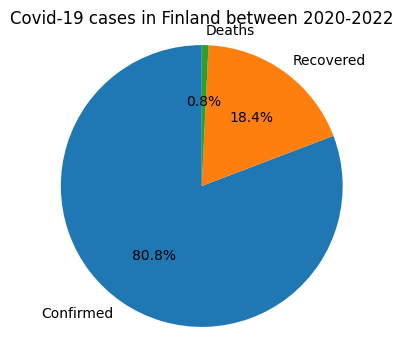

In [56]:
total_cases = df_finland[["Confirmed", "Recovered", "Deaths"]].sum()

plt.figure(figsize=(4,4))
plt.pie(total_cases.values, labels=total_cases.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Covid-19 cases in Finland between 2020-2022")
plt.show()

## Manipulating the data

In [57]:
# Copying the original data to a new variable
mod_data = data.copy()

# Adding Death rate and Recovered rate columns to the dataset
mod_data["Death rate"] = (mod_data["Deaths"]/mod_data["Confirmed"])*100
mod_data["Recovery rate"] = (mod_data["Recovered"]/mod_data["Confirmed"])*100

# If Death rate or Recovered rate is NaN, then replace it with average of the other columns.
mod_data['Death rate'] = mod_data['Death rate'].fillna(mod_data['Death rate'].mean())
mod_data['Recovery rate'] = mod_data['Recovery rate'].fillna(mod_data['Recovery rate'].mean())

# If Death rate or Recovered rate is infinite due to zero divison, then replace it with 0.
mod_data['Death rate'] = mod_data['Death rate'].replace([float('inf')], 0)
mod_data['Recovery rate'] = mod_data['Recovery rate'].replace([float('inf')], 0)

# Shows the first 5 rows of the modified dataset
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143668 entries, 0 to 143667
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           143668 non-null  object 
 1   Country        143668 non-null  object 
 2   Confirmed      143668 non-null  int64  
 3   Recovered      143668 non-null  int64  
 4   Deaths         143668 non-null  int64  
 5   Year           143668 non-null  int32  
 6   Death rate     143668 non-null  float64
 7   Recovery rate  143668 non-null  float64
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 8.2+ MB


In [58]:
mod_data.describe()

,Confirmed,Recovered,Deaths,Year,Death rate,Recovery rate
count,1.436680e+05,1.436680e+05,143668.000000,143668.000000,143668.000000,143668.000000
mean,5.712247e+05,1.635121e+05,12306.660189,2020.560709,2.280071,50.305434
std,2.838398e+06,1.032340e+06,52910.346456,0.555943,3.382862,38.481890
min,0.000000e+00,0.000000e+00,0.000000,2020.000000,0.000000,0.000000
25%,9.100000e+02,0.000000e+00,13.000000,2020.000000,0.628307,0.000000
50%,1.749300e+04,7.240000e+02,289.000000,2021.000000,1.550272,51.082907
75%,2.060302e+05,2.687300e+04,3647.000000,2021.000000,2.704995,88.750946
max,7.069942e+07,3.097475e+07,866540.000000,2022.000000,100.000000,112.903226


### Plotting the death rates of the countries

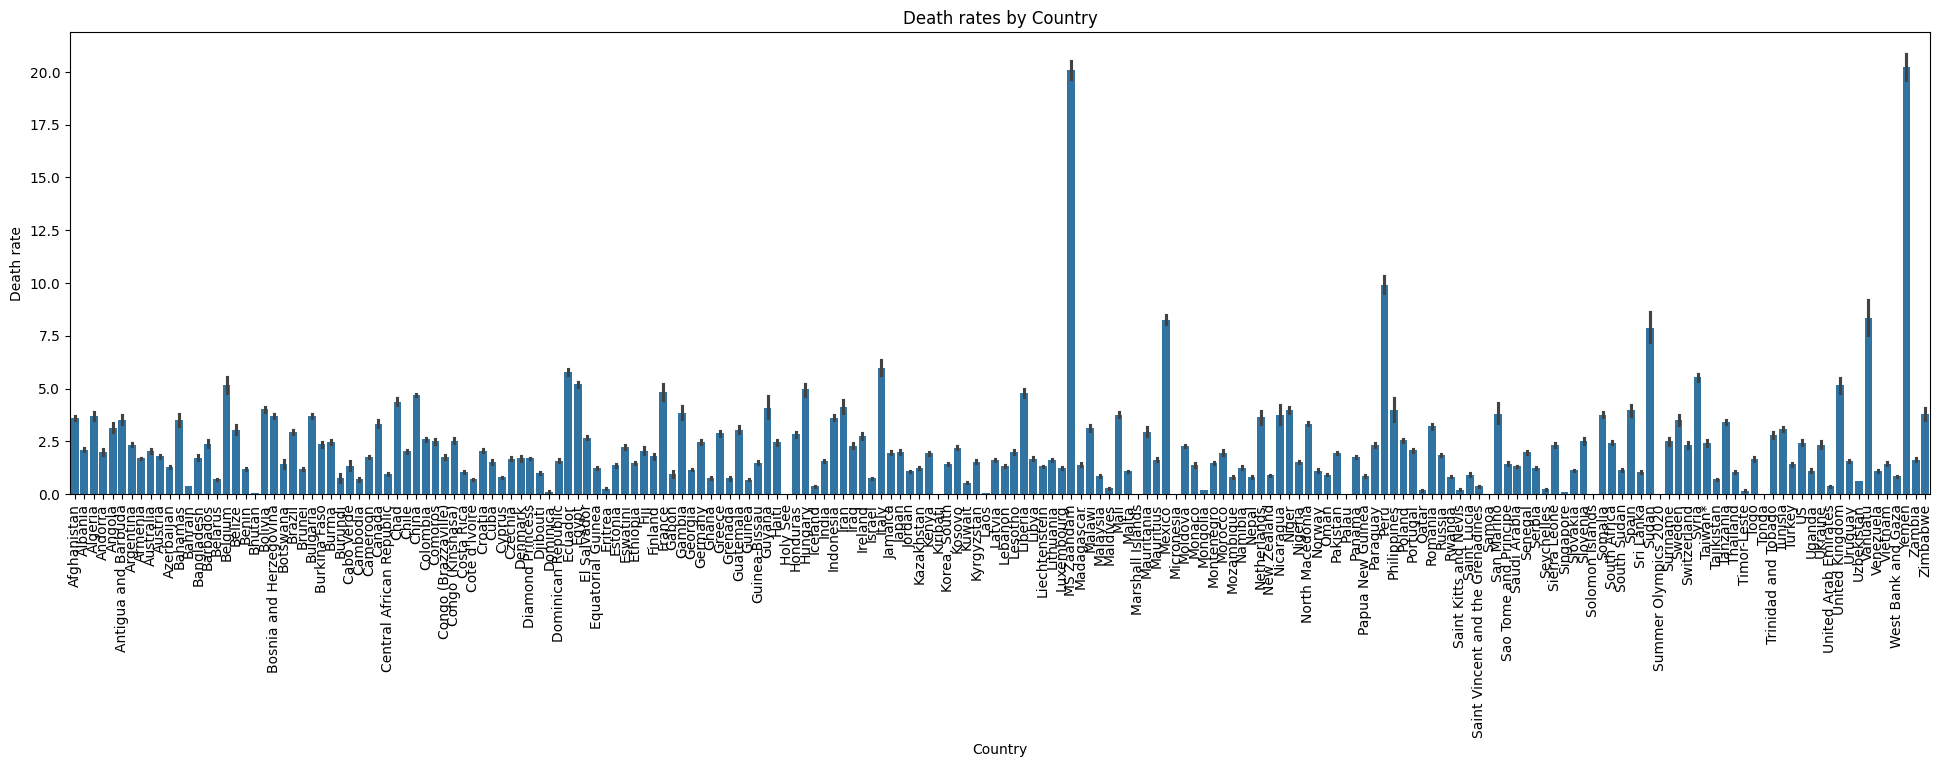

In [59]:
# Plotting the Death rate and Recovery rate histograms in the dataset
plt.figure(figsize=(24,6))
sns.barplot(x='Country', y='Death rate', data=mod_data)
plt.title('Death rates by Country')
plt.ylabel('Death rate')
plt.xlabel('Country')
plt.xticks(rotation=90)  # This will rotate the country names so they don't overlap
plt.show()

### Plotting the recovery rates of the countries

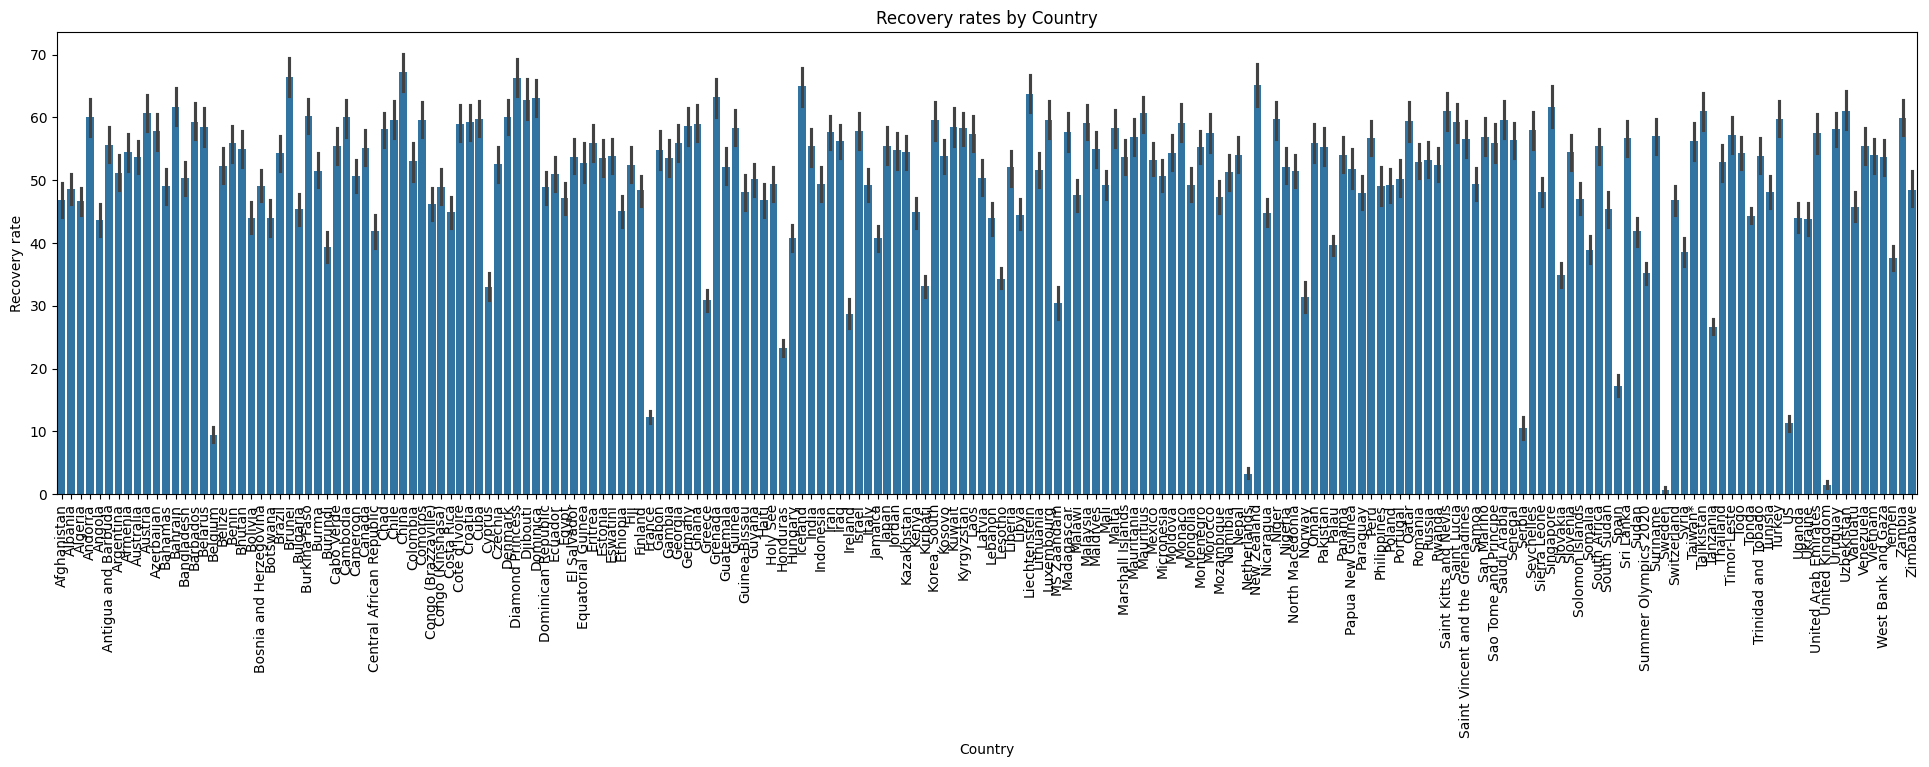

In [60]:
plt.figure(figsize=(24,6))
sns.barplot(x='Country', y='Recovery rate', data=mod_data)
plt.title('Recovery rates by Country')
plt.ylabel('Recovery rate')
plt.xlabel('Country')
plt.xticks(rotation=90)  # This will rotate the country names so they don't overlap
plt.show()

We can see from the plots, that they are not completely opposites of themselves, so we might get more information from them.

In [61]:
# Adding also Recovery Death rate column to the dataset
mod_data["Recovery Death rate"] = (mod_data["Recovered"]/mod_data["Deaths"])*100
mod_data['Recovery Death rate'] = mod_data['Recovery Death rate'].fillna(mod_data['Recovery Death rate'].mean())
mod_data['Recovery Death rate'] = mod_data['Recovery Death rate'].replace([float('inf')], 0)

mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143668 entries, 0 to 143667
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 143668 non-null  object 
 1   Country              143668 non-null  object 
 2   Confirmed            143668 non-null  int64  
 3   Recovered            143668 non-null  int64  
 4   Deaths               143668 non-null  int64  
 5   Year                 143668 non-null  int32  
 6   Death rate           143668 non-null  float64
 7   Recovery rate        143668 non-null  float64
 8   Recovery Death rate  143668 non-null  float64
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 9.3+ MB


Plotting the Revocery Death rates

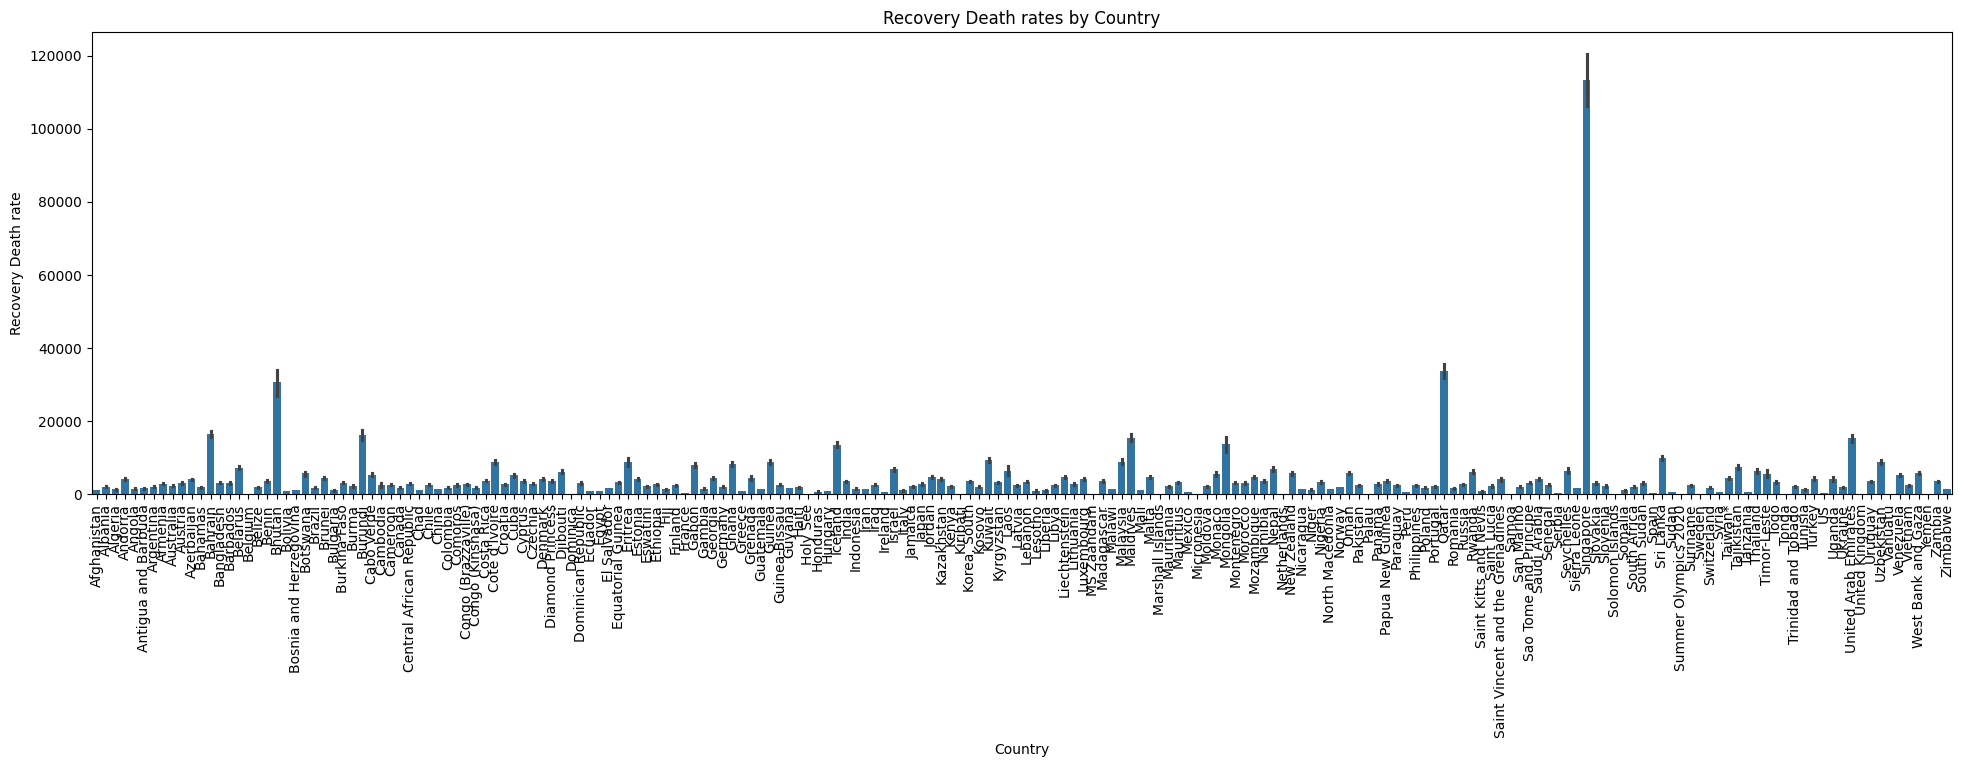

In [62]:
plt.figure(figsize=(24,6))
sns.barplot(x='Country', y='Recovery Death rate', data=mod_data)
plt.title('Recovery Death rates by Country')
plt.ylabel('Recovery Death rate')
plt.xlabel('Country')
plt.xticks(rotation=90)  # This will rotate the country names so they don't overlap
plt.show()

In [71]:
mod_data['Subtraction_Ratio'] = (mod_data['Recovered'] - mod_data['Deaths']) / mod_data['Confirmed']
mod_data['Subtraction_Ratio'] = mod_data['Subtraction_Ratio'].fillna(mod_data['Subtraction_Ratio'].mean())
mod_data['Subtraction_Ratio'] = mod_data['Subtraction_Ratio'].replace([-np.inf, np.inf], 0)
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143668 entries, 0 to 143667
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 143668 non-null  object 
 1   Country              143668 non-null  object 
 2   Confirmed            143668 non-null  int64  
 3   Recovered            143668 non-null  int64  
 4   Deaths               143668 non-null  int64  
 5   Year                 143668 non-null  int32  
 6   Death rate           143668 non-null  float64
 7   Recovery rate        143668 non-null  float64
 8   Recovery Death rate  143668 non-null  float64
 9   Subtraction_Ratio    143668 non-null  float64
dtypes: float64(4), int32(1), int64(3), object(2)
memory usage: 10.4+ MB


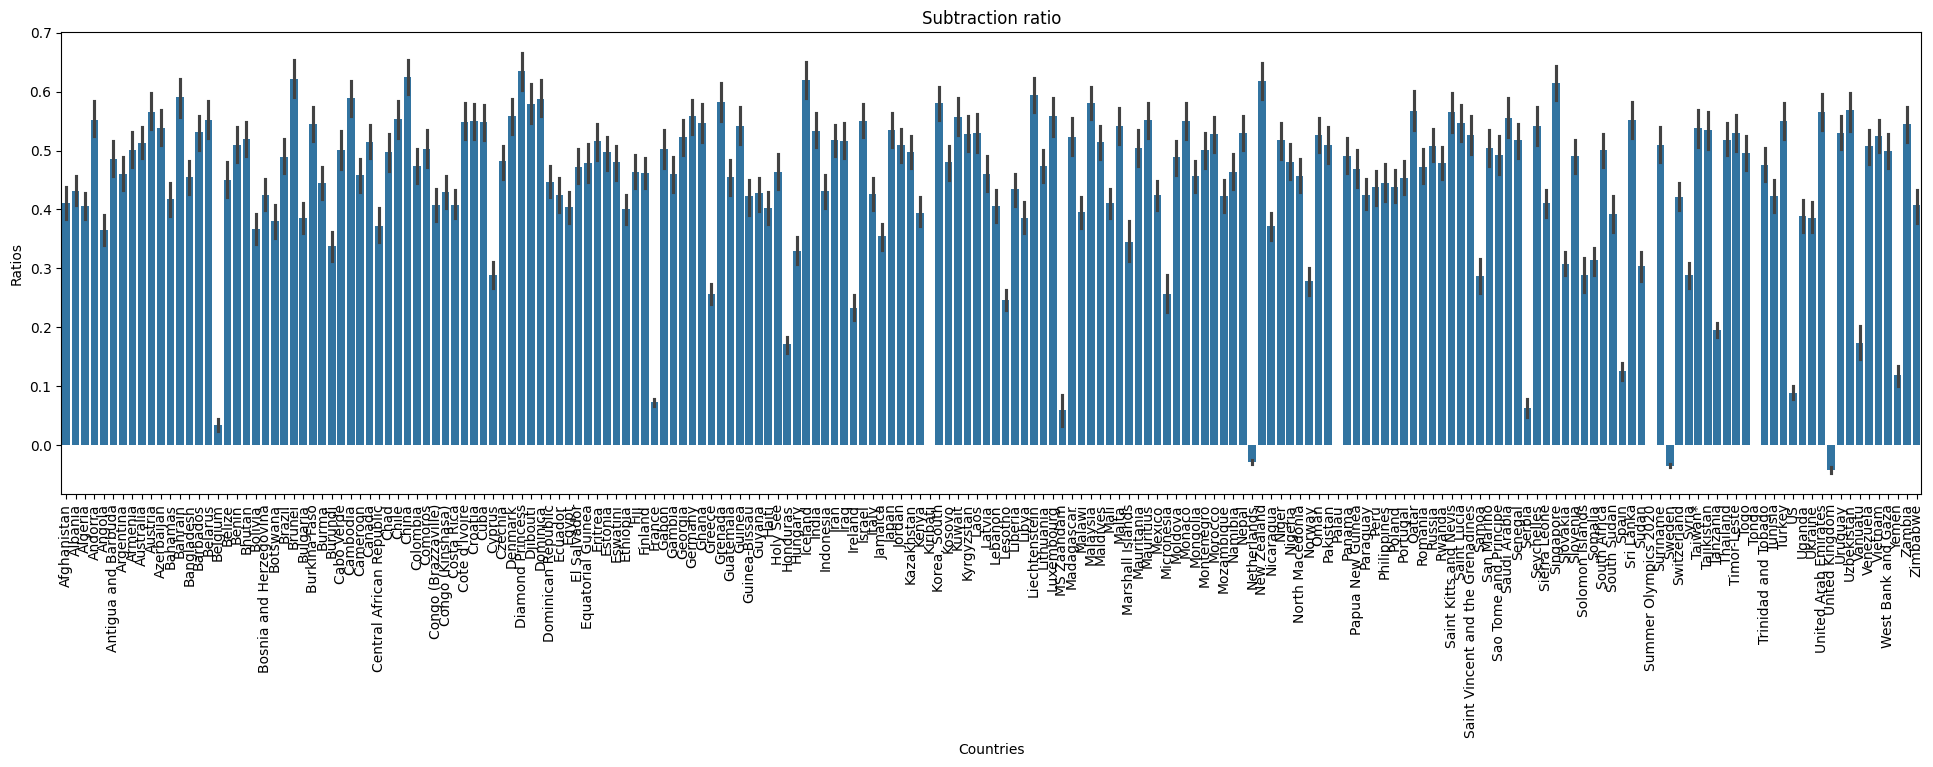

In [73]:
plt.figure(figsize=(24,6))
sns.barplot(x='Country', y='Subtraction_Ratio', data=mod_data)
plt.title('Subtraction ratio')
plt.xlabel('Countries')
plt.ylabel('Ratios')
plt.xticks(rotation=90)
plt.show()

Seems like there is again some new outliers that might give us some new information.

Let's try next if we could add some polynomial features to the dataset and then reduce the amount of noisy features with  **PCA (Principal Component Analysis)**.

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Copying the data with new features.
pca_data = mod_data.copy()

features = ['Confirmed', 'Recovered', 'Deaths', 'Death rate', 'Recovery rate', 'Recovery Death rate']
X = pca_data[features].copy()
print(f'The dimensionality of the features before transformation: {X.shape}\n')

# Polynomial transformation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
print(f'The dimensionality of the features after transformation: {X_poly.shape}\n')

# Scaling the data for PCA.
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Performing the PCA on the modified data.
transformer = PCA(n_components=2)
X_transformed = transformer.fit_transform(X_poly_scaled)
print(f'The dimensionality of the features after transformation: {X_transformed.shape}')

The dimensionality of the features before transformation: (143668, 6)

The dimensionality of the features after transformation: (143668, 84)

The dimensionality of the features after transformation: (143668, 2)


Seems like **PCA** reduces the amount of features to **2**, which is probably too low amount for the model, because there are 195 classes and probably similar data in every row, so the model cannot learn effectively. So it is probably just better to use polynomial features as they are and then after the modeling check which features affect the modeling the most and then reduce underperforming features.

## Change log

| Date | Version | Change Description |
| --- | --- | --- |
| 29.5.2024 | 1.0.1 | Data manipulated and added plots. Added more visuals for the confirmed, recovered and deaths analyses |
| 4.8.2024 | 1.0.2 | Added polynomial features and principal component analysis|
